In [7]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import color

In [8]:
def dist_euclidean(i1, i2):
    return np.sqrt(np.sum((i1 - i2)**2)) / i1.size


def dist_manhattan(i1, i2):
    return np.sum(np.abs(i1 - i2)) / i1.size


In [19]:
def get_img_approx(k):
    img = plt.imread('img.png')
    img = color.rgb2gray(img)
    
    U, s, VT = np.linalg.svd(img)
    
    img_approx = [[0 for _ in range(len(U))] for _ in range(len(U))]
    
    for i in range(k):
        img_approx += s[i]*np.outer(U.T[i], VT[i])
    return img_approx
    

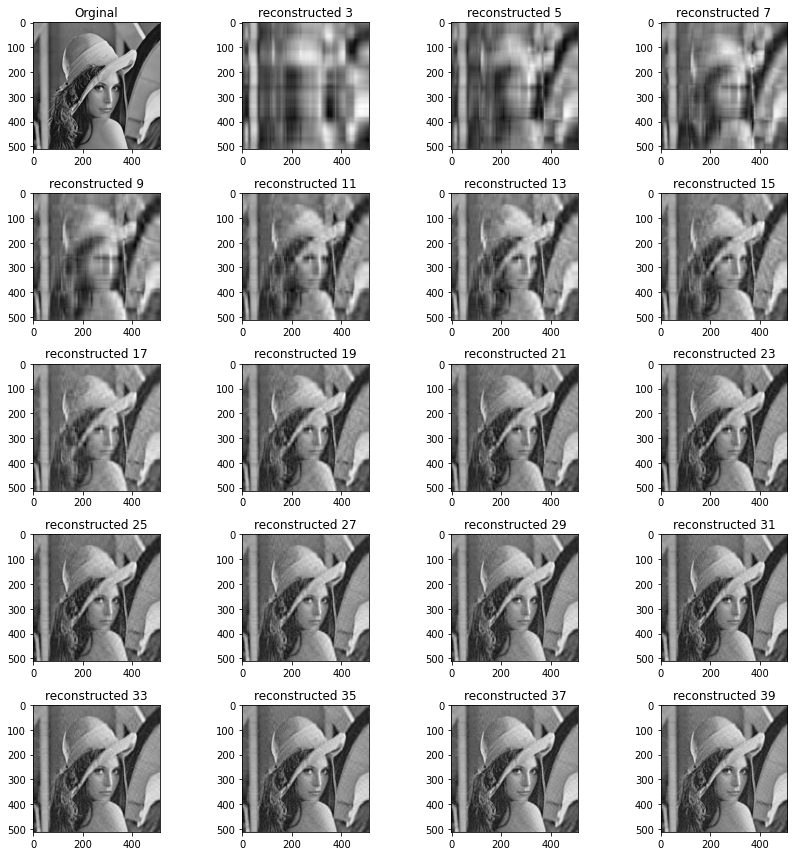

In [48]:
K = range(1, 50, 2)

img = plt.imread('img.png')
img = color.rgb2gray(img)

_, axs = plt.subplots(5, 4, figsize=(12, 12))
axs = axs.flatten()
i = 0
for ax, k in zip(axs, K):
    if i == 0:
        ax.imshow(img, cmap='gray')
        ax.set_title("Orginal")
    else:
        ax.imshow(get_img_approx(k), cmap='gray')
        ax.set_title(f"reconstructed {k}")
    i += 1
plt.tight_layout()
plt.show()

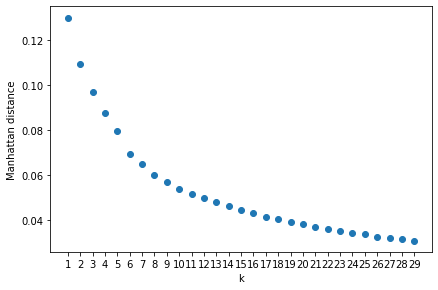

In [43]:
K = range(1, 30)

img = plt.imread('img.png')
img = color.rgb2gray(img)

y = []

for k in K:
    y.append(dist_manhattan(img, get_img_approx(k)))
plt.xticks(K)
plt.tight_layout()
plt.ylabel("Manhattan distance")
plt.xlabel("k")
plt.scatter(K, y)

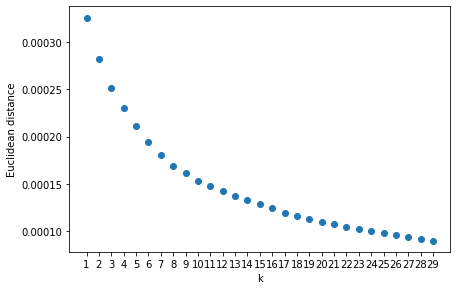

In [44]:
K = range(1, 30)

img = plt.imread('img.png')
img = color.rgb2gray(img)

y = []

for k in K:
    y.append(dist_euclidean(img, get_img_approx(k)))
plt.xticks(K)
plt.tight_layout()
plt.ylabel("Euclidean distance")
plt.xlabel("k")
plt.scatter(K, y)